In [1]:
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/enrg_s0_train.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/grad_1_train.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/geom.txt

--2023-06-14 05:12:36--  https://raw.githubusercontent.com/QwanXiong/NN_properties/main/enrg_s0_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76000 (74K) [text/plain]
Saving to: ‘enrg_s0_train.txt’

enrg_s0_train.txt   100%[===================>]  74.22K  --.-KB/s    in 0.008s  

2023-06-14 05:12:36 (9.40 MB/s) - ‘enrg_s0_train.txt’ saved [76000/76000]

--2023-06-14 05:12:36--  https://raw.githubusercontent.com/QwanXiong/NN_properties/main/grad_1_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766545 (749K) [t

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
bohr_to_ang = 0.529177

In [3]:
geom = np.loadtxt('geom.txt')
geom = geom.reshape((4000,6,3),order='C')*bohr_to_ang
enrg_s0 = np.loadtxt('enrg_s0_train.txt').reshape(4000,1)
grad_s0 = np.loadtxt('grad_1_train.txt').reshape((4000,6,3),order='C')/bohr_to_ang
z = np.array([6,7,1,1,1,1],dtype='uint8')


In [ ]:
#de/dang = de/dbohr*dbohr/dang = 1/bohr_to_ang*de/dang
#bohr = ang/bohr_to_ang

In [4]:
forces_s0 = -np.copy(grad_s0)

In [ ]:
#forces_s0+grad_s0

In [5]:
geom_train,geom_test, enrg_s0_train, enrg_s0_test,grad_s0_train,grad_s0_test = \
train_test_split(geom,enrg_s0,forces_s0,test_size=0.1,random_state=42, shuffle=True)

In [6]:
grad_s0_train.shape

(3600, 6, 3)

In [7]:
with open('ch2nh2+_pot_train.npz','wb') as fil:
  np.savez(fil,E=enrg_s0_train,F=grad_s0_train,z=z,R=geom_train )

with open('ch2nh2+_pot_test.npz','wb') as fil:
  np.savez(fil,E=enrg_s0_test,F=grad_s0_test,z=z,R=geom_test )

In [8]:
with np.load('ch2nh2+_pot_test.npz') as fil:
  print(fil.files)
  print(fil['R'].shape)

['E', 'F', 'z', 'R']
(400, 6, 3)


In [9]:
%%capture
# install wandb
!pip install wandb
# install nequip
!git clone --depth 1 "https://github.com/mir-group/nequip.git"
!pip install nequip/
# fix colab imports
import site
site.main()
# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"
import numpy as np
import torch
from ase.io import read, write
np.random.seed(0)
torch.manual_seed(0)

In [10]:
#!cp nequip/configs/example.yaml nequip/configs/example_ch2nh2.yaml

In [17]:
!wget https://raw.githubusercontent.com/QwanXiong/NN_fits/main/ch2nh2.yaml
!mv ch2nh2.yaml nequip/configs/example_ch2nh2.yaml

--2023-06-14 05:38:17--  https://raw.githubusercontent.com/QwanXiong/NN_fits/main/ch2nh2.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12468 (12K) [text/plain]
Saving to: ‘ch2nh2.yaml’

ch2nh2.yaml         100%[===================>]  12.18K  --.-KB/s    in 0s      

2023-06-14 05:38:17 (89.8 MB/s) - ‘ch2nh2.yaml’ saved [12468/12468]



In [18]:
!rm -rf ./results
!nequip-train nequip/configs/example_ch2nh2.yaml

wandb: Currently logged in as: anony-mouse-1540052. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.4
wandb: Run data is saved locally in /content/wandb/run-20230614_053830-eqyp79c1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run example-run-toluene
wandb: ⭐️ View project at https://wandb.ai/anony-mouse-1540052/toluene-example?apiKey=84d241338da7034b2a96ec21f5fe709a57c09563
wandb: 🚀 View run at https://wandb.ai/anony-mouse-1540052/toluene-example/runs/eqyp79c1?apiKey=84d241338da7034b2a96ec21f5fe709a57c09563
wandb: WARNING Do NOT share these links with anyone. They can be used to claim your runs.
Torch device: cpu
Processing dataset...
Loaded data: Batch(batch=[21600], cell=[3600, 3, 3], edge_cell_shift=[107904, 3], edge_index=[2, 107904], forces=[21600, 3], pbc=[3600, 3], pos=[21600, 3], ptr=[3601], total_energy=[3600, 1])
    processed data size: ~3.72 MB
Cached processed data to disk
Done!
Successfully loaded the data set of

In [ ]:
!nequip-deploy build --train-dir results/ch2nh2/example-run-ch2nh2 ch2nh2-deployed.pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.


In [ ]:
!nequip-evaluate --train-dir results/ch2nh2/example-run-ch2nh2 --batch-size 50

Using device: cuda
Loading model... 
loaded model from training session
Loading original dataset...
Loaded dataset specified in config.yaml.
Using origial training dataset (3600 frames) minus training (2500 frames) and validation frames (200 frames), yielding a test set size of 900 frames.
Starting...
  0% 0/900 [00:00<?, ?it/s]

  6% 50/900 [00:00<00:15, 55.90it/s]
 11% 100/900 [00:01<00:15, 52.49it/s]
 17% 150/900 [00:04<00:28, 26.69it/s]

 28% 250/900 [00:05<00:11, 58.23it/s]

 39% 350/900 [00:05<00:05, 97.62it/s]

 50% 450/900 [00:05<00:03, 145.29it/s]

 61% 550/900 [00:05<00:01, 199.27it/s]

 72% 650/900 [00:05<00:00, 259.68it/s]

 83% 750/900 [00:05<00:00, 321.96it/s]

 94% 850/900 [00:05<00:00, 383.16it/s]
100% 900/900 [00:06<00:00, 148.57it/s]


--- Final result: ---
               f_mae =  0.002156           
              f_rmse =  0.005635           
             H_f_mae =  0.001723           
             C_f_mae =  0.003147           
             N_f_mae =  0.002897      

In [ ]:
from nequip.ase.nequip_calculator import NequIPCalculator

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
FOLDER = "/content/drive/MyDrive/init_models"

In [ ]:
model_s0 = NequIPCalculator.from_deployed_model(f"{FOLDER}/ch2nh2-deployed.pth")

/usr/local/lib/python3.9/dist-packages/nequip/utils/_global_options.py:58: UserWarning: Setting the GLOBAL value for jit fusion strategy to `[('DYNAMIC', 3)]` which is different than the previous value of `[('STATIC', 2), ('DYNAMIC', 10)]`
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/nequip/ase/nequip_calculator.py:73: UserWarning: Trying to use chemical symbols as NequIP type names; this may not be correct for your model! To avoid this warning, please provide `species_to_type_name` explicitly.
  warnings.warn(


In [ ]:
mol = read(f"{FOLDER}/CH2NH2+_random.xyz")

In [ ]:
mol.get_potential_energy()

-94.46443673

In [ ]:
model_s0.get_potential_energy(mol)

0.6605416536331177

In [ ]:
%%time
grad_pred = np.zeros((3000,18))
enrg_pred = np.zeros(3000)

for i in range(2000):
  if (i % 200 ==0):
    print(i)
  mol.set_positions(geom[i,:])
 # ff = model_s0.get_forces(mol).astype('float64')
  enrg_pred[i] = model_s0.get_potential_energy(mol)
  #grad_pred[i,:] = np.copy(ff).reshape(-1,)

0
200
400
600
800
1000
1200
1400
1600
1800
CPU times: user 3min 29s, sys: 2min 19s, total: 5min 49s
Wall time: 3min 50s


In [ ]:
import matplotlib.pyplot as plt

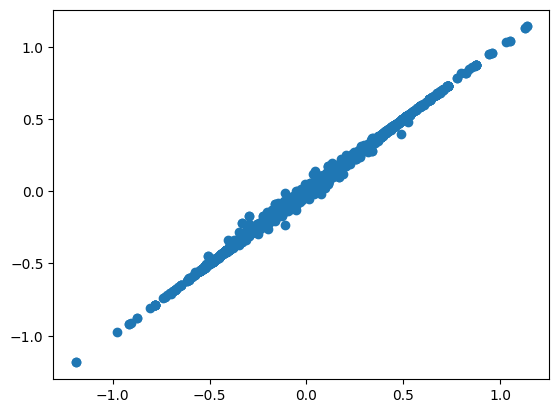

In [ ]:
plt.scatter(grad_s0[:3000,:],-grad_pred[:3000,:])

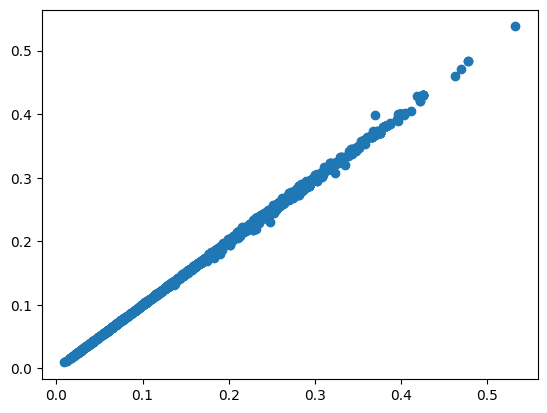

In [ ]:
plt.scatter(enrg_s0[:3000],enrg_pred[:3000])